In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier



data = pd.read_excel('phone_prices.xlsx')

In [2]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
#Boş değerler var mı ?

null_sum=data.isnull().sum()

null_sum

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
#Veriler eşit sayıda mı? değilse veri yanlılığına yol açabilir, ve model düzgün çalışmaz

data["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [53]:
#Veriler hakkında istatiksel bilgiler
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


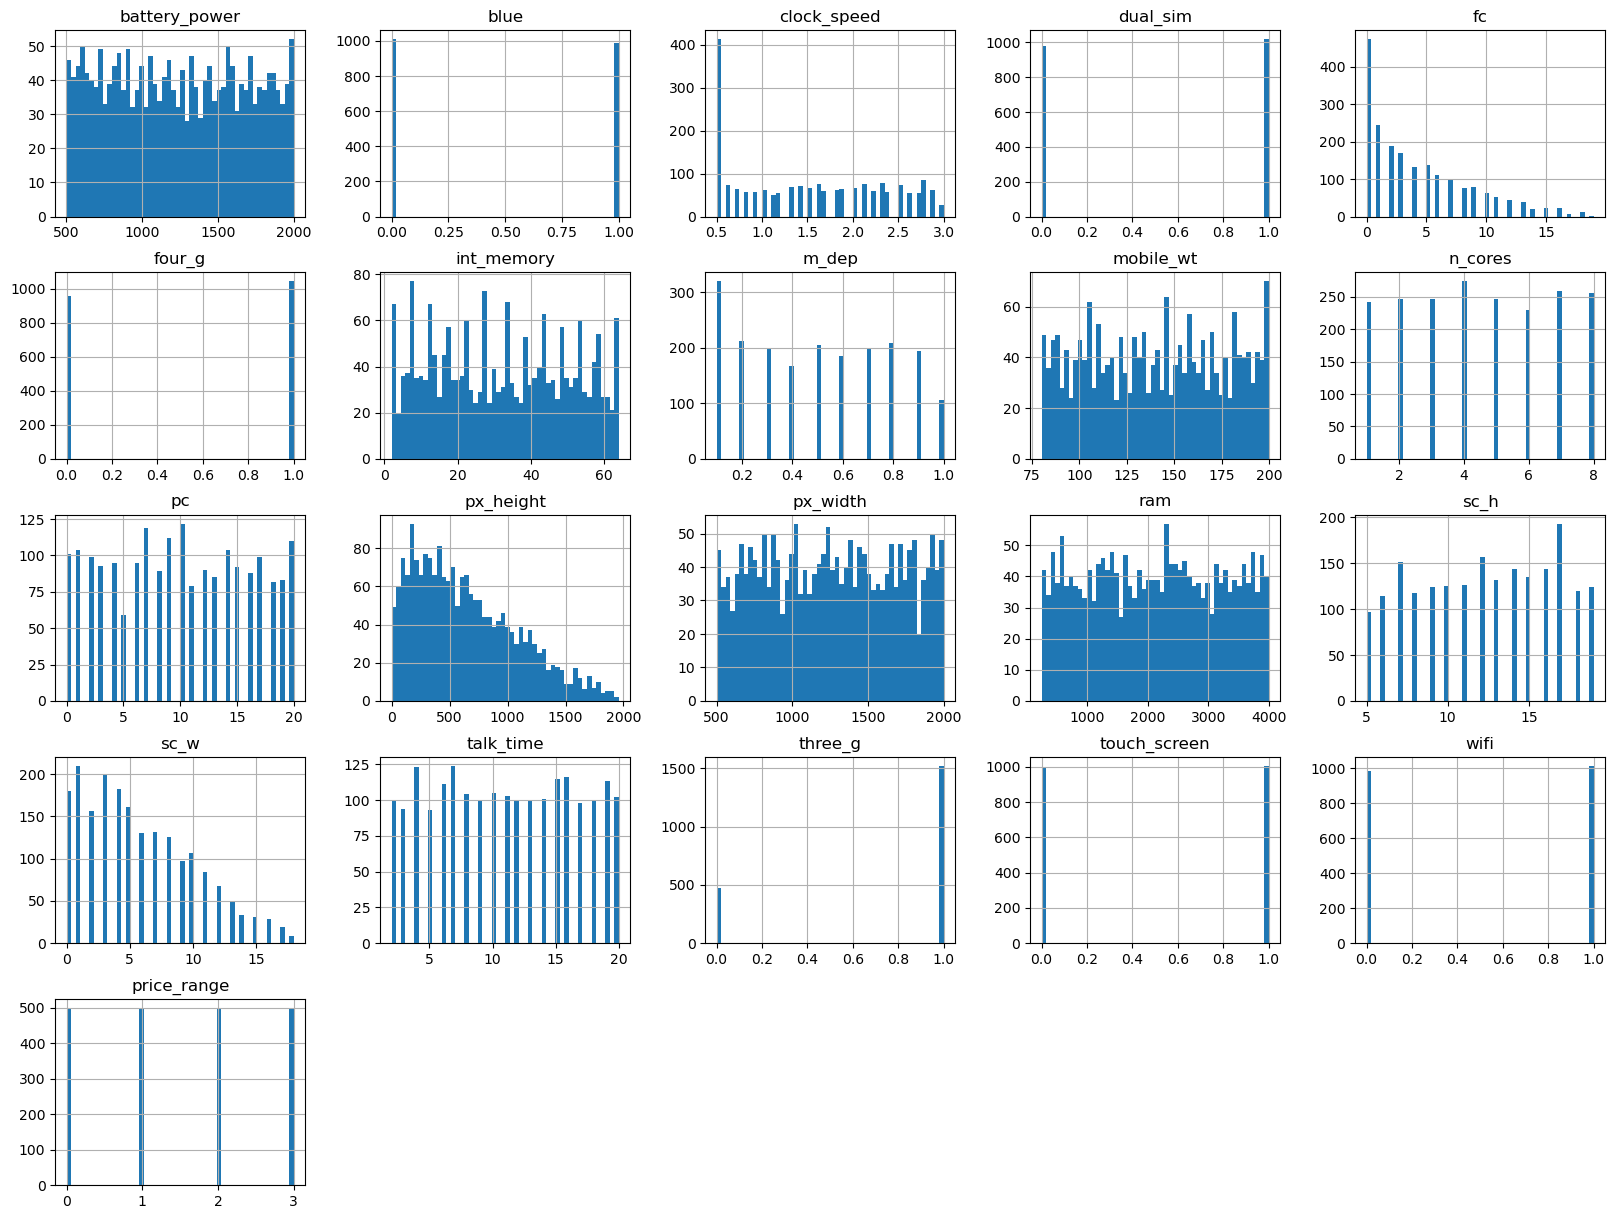

In [8]:
import seaborn as sns

data.hist(bins=50,figsize=(20,15))
plt.show()

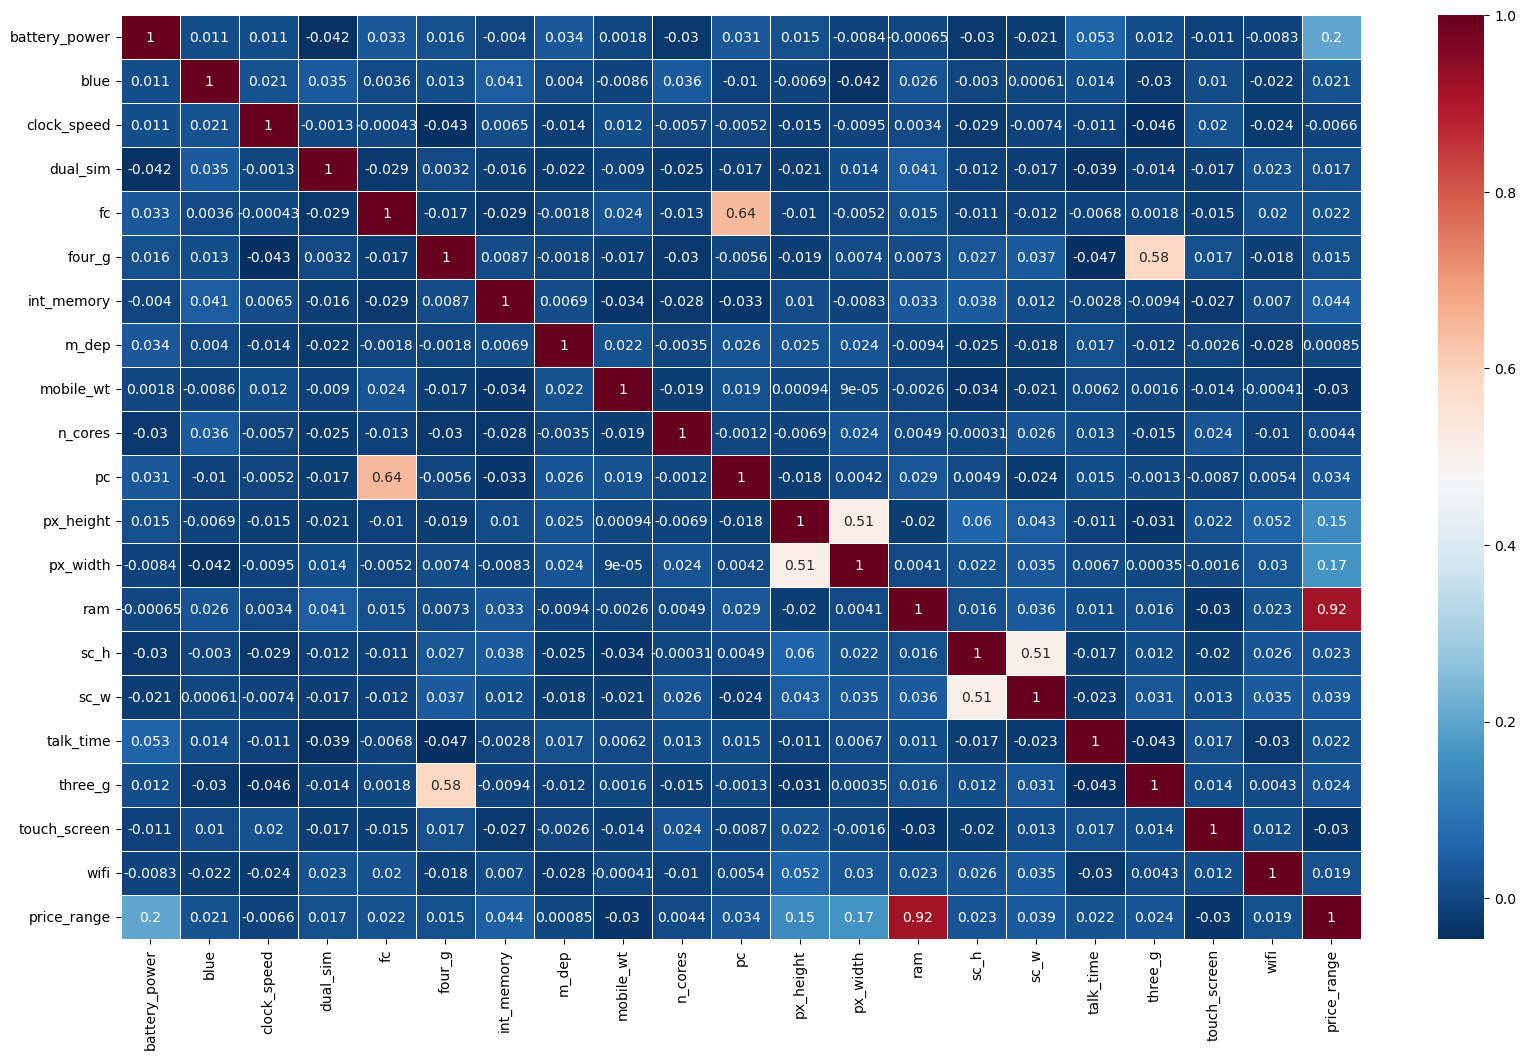

In [10]:
fig,ax = plt.subplots(figsize =(20,12))
ax = sns.heatmap(data.corr(),cmap='RdBu_r',cbar =True, annot=True,linewidths=0.5,ax=ax)
plt.show()

In [22]:
df = data.copy()

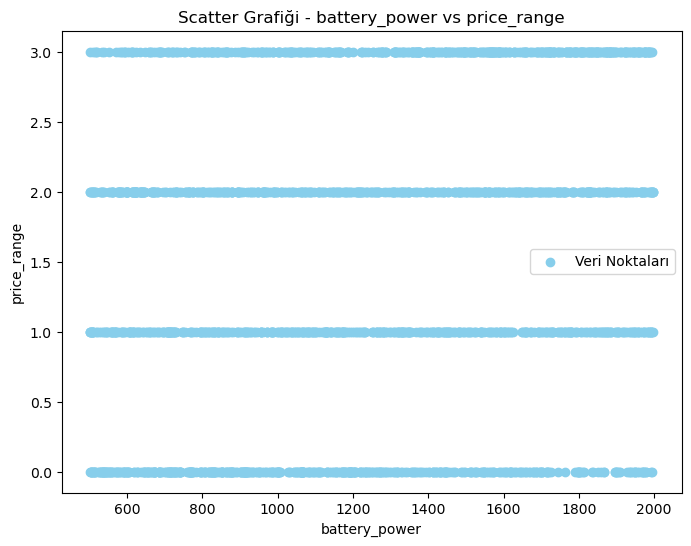

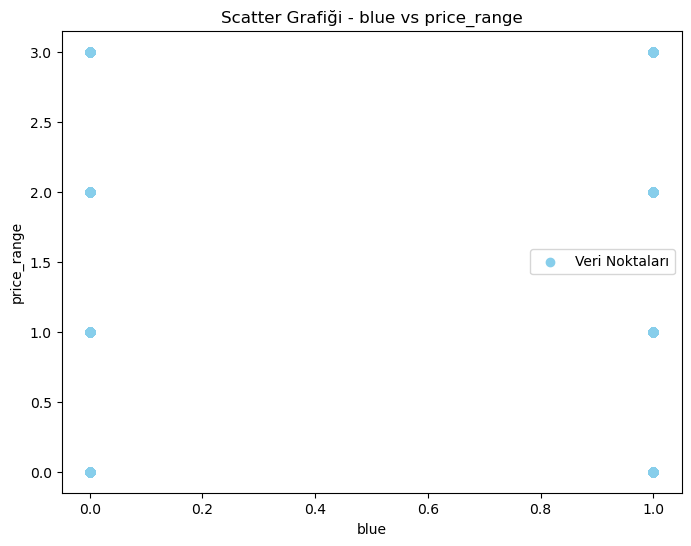

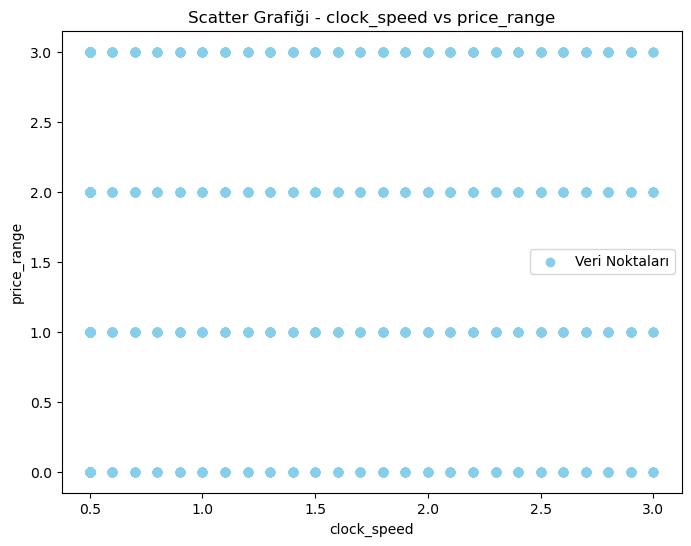

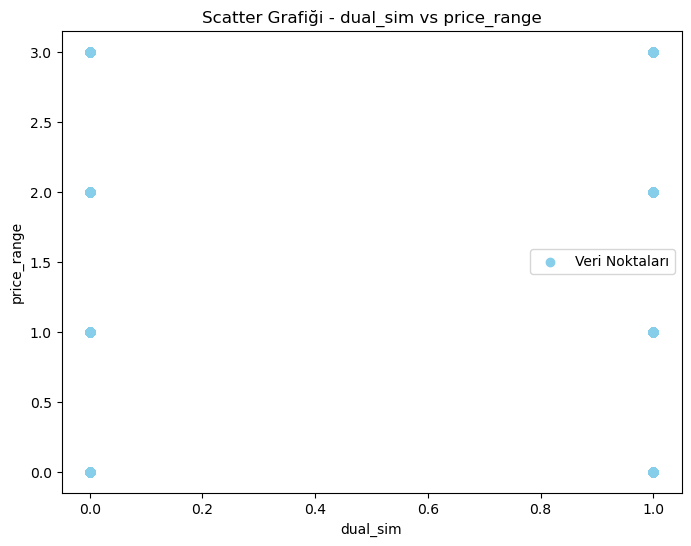

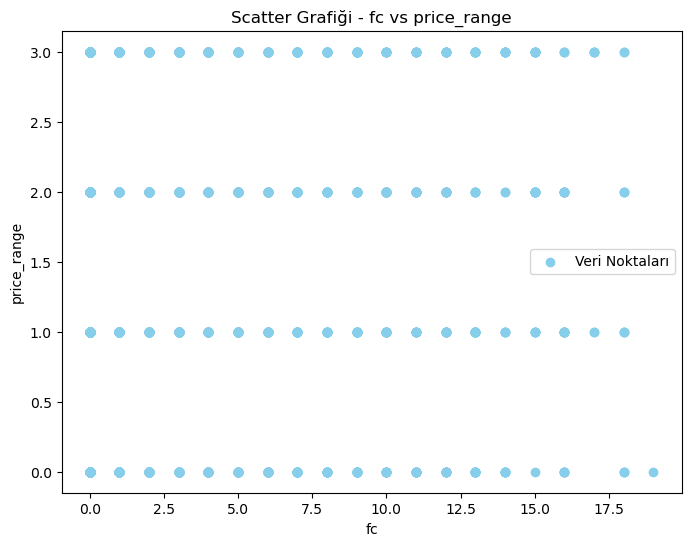

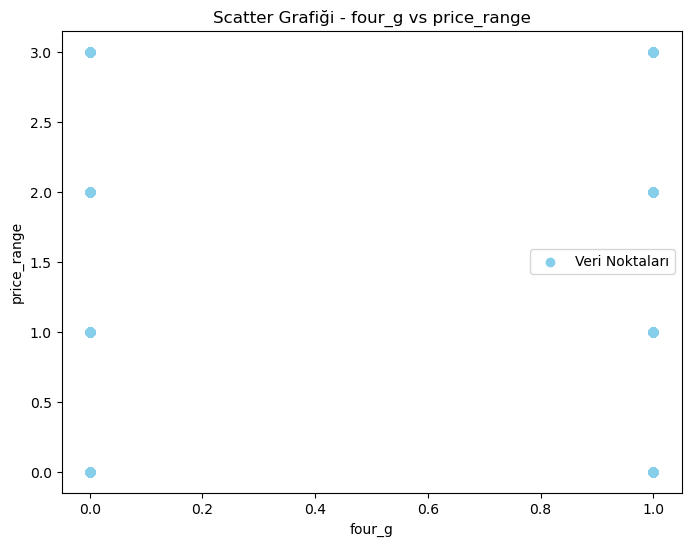

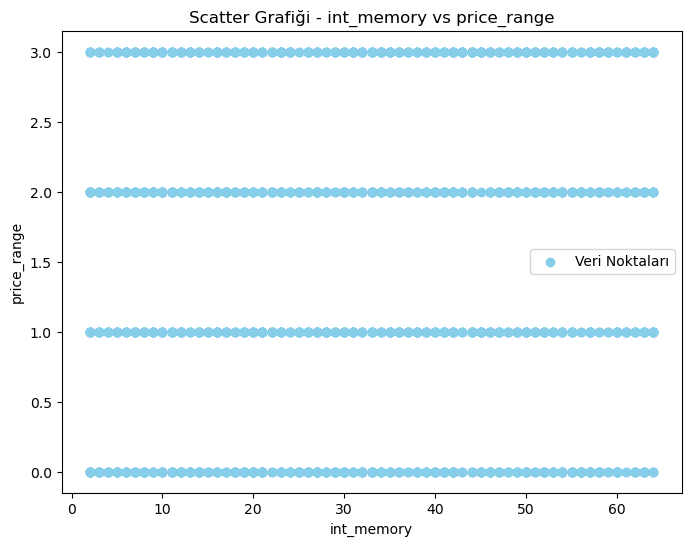

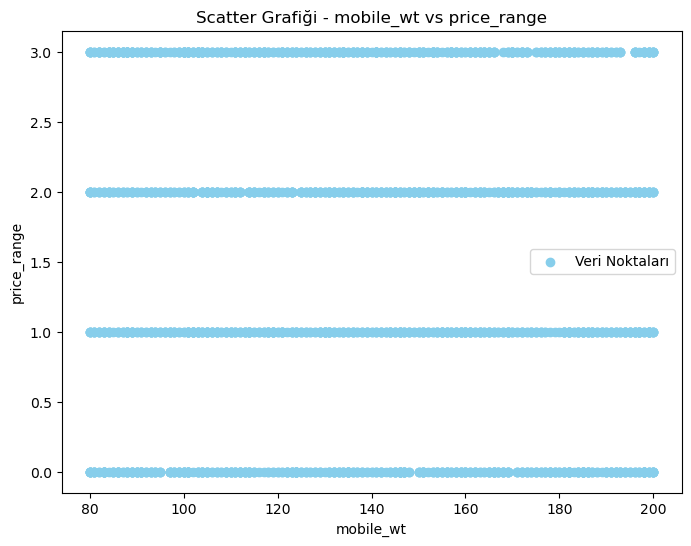

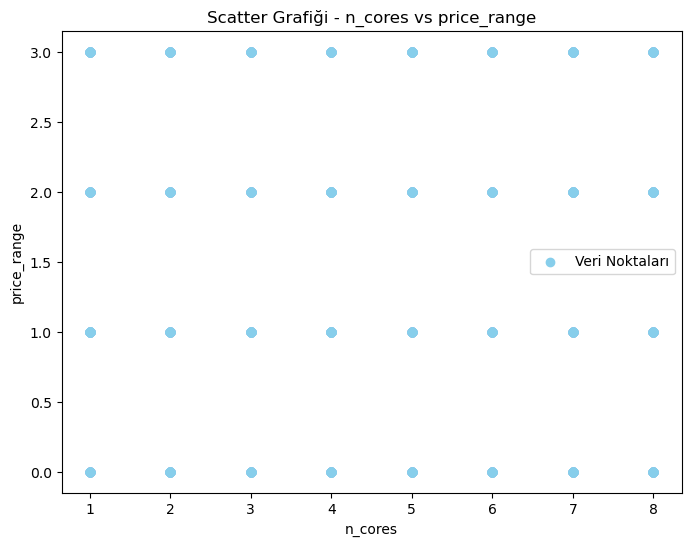

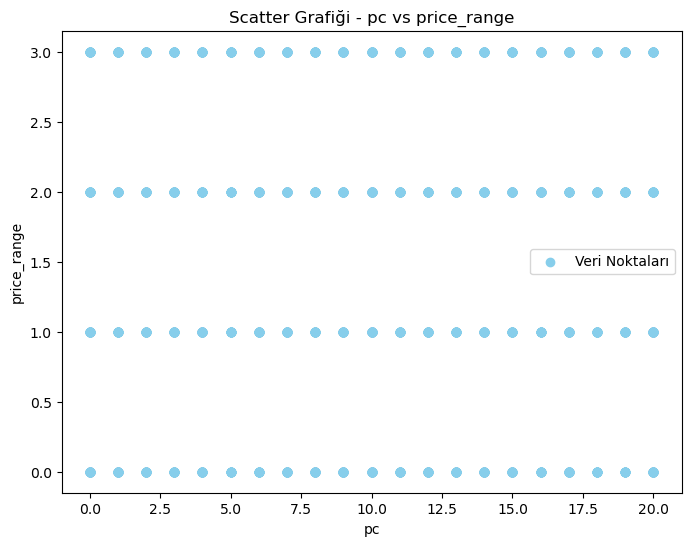

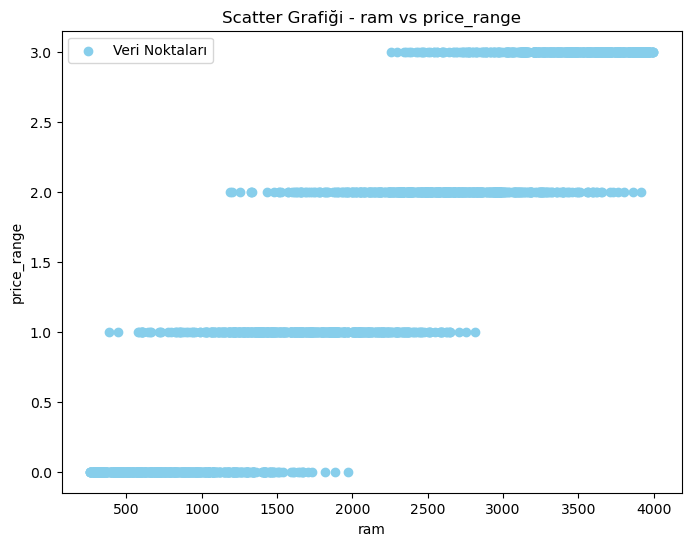

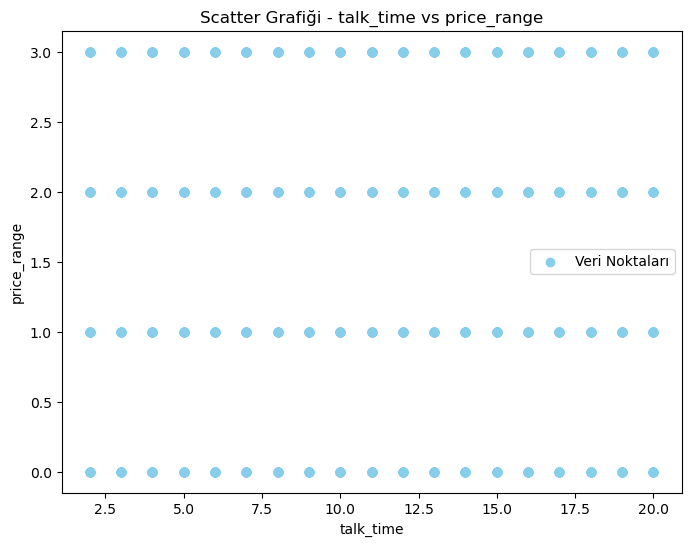

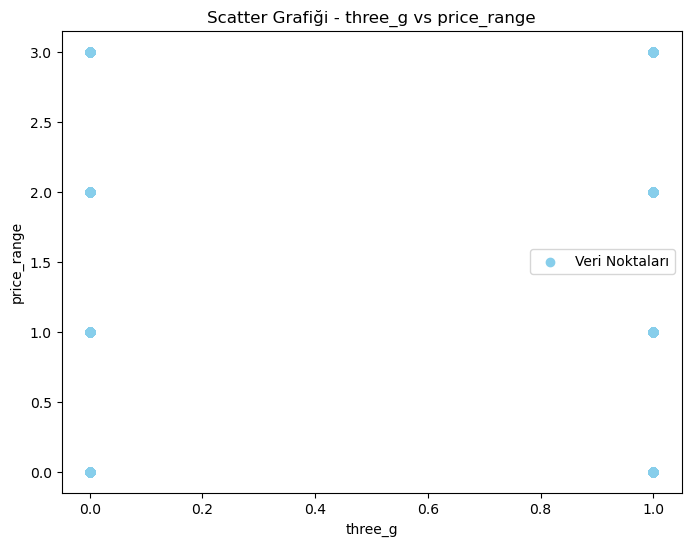

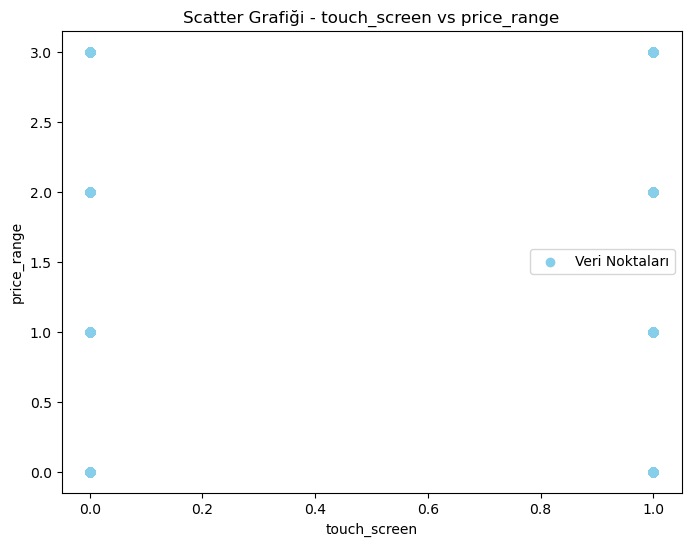

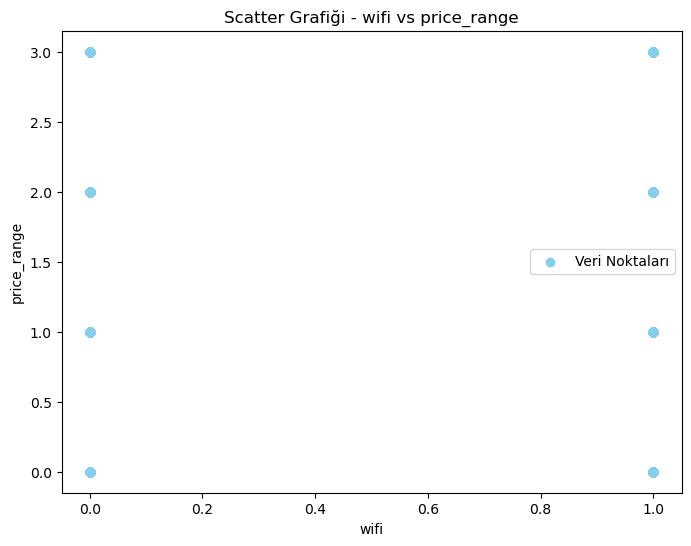

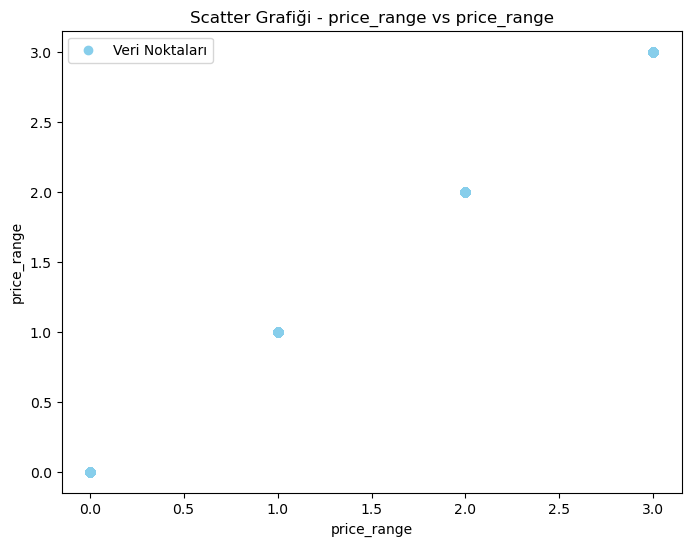

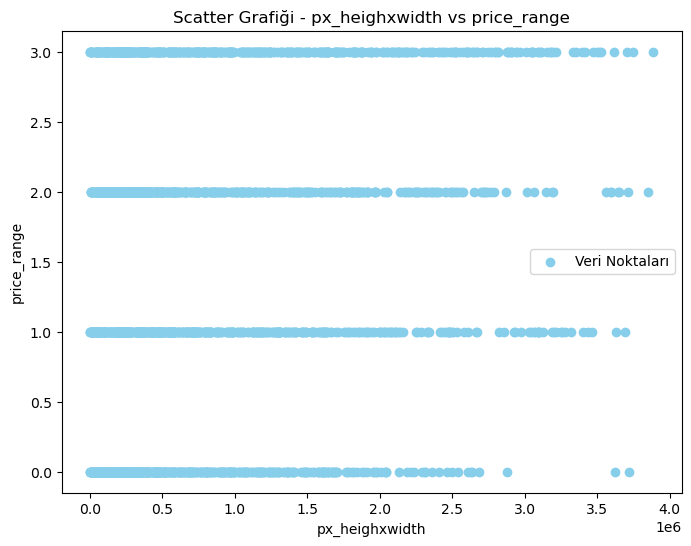

In [54]:
# Violin plot çizimi
for column in df.columns[:-1]:  # 'price_range' sütunu hariç
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df['price_range'], color='skyblue', label='Veri Noktaları')
    plt.title(f'Scatter Grafiği - {column} vs price_range')
    plt.xlabel(column)
    plt.ylabel('price_range')
    plt.legend()
    plt.show()

In [23]:
#Özellik mühendisliği

df['px_heighxwidth'] =df['px_height']*df['px_width']
df['sc_hxw'] = df['sc_h']*df['sc_w']

df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,px_heighxwidth,sc_hxw
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,15120,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,1799140,51
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,2167308,22
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,2171776,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,1464096,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,668,13,4,19,1,1,0,0,2309580,52
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,2032,11,10,16,1,1,1,2,1797975,110
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,3057,9,1,5,1,1,0,3,1416576,9
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,869,18,10,19,1,1,1,0,225120,180


In [56]:
df.shape

(2000, 18)

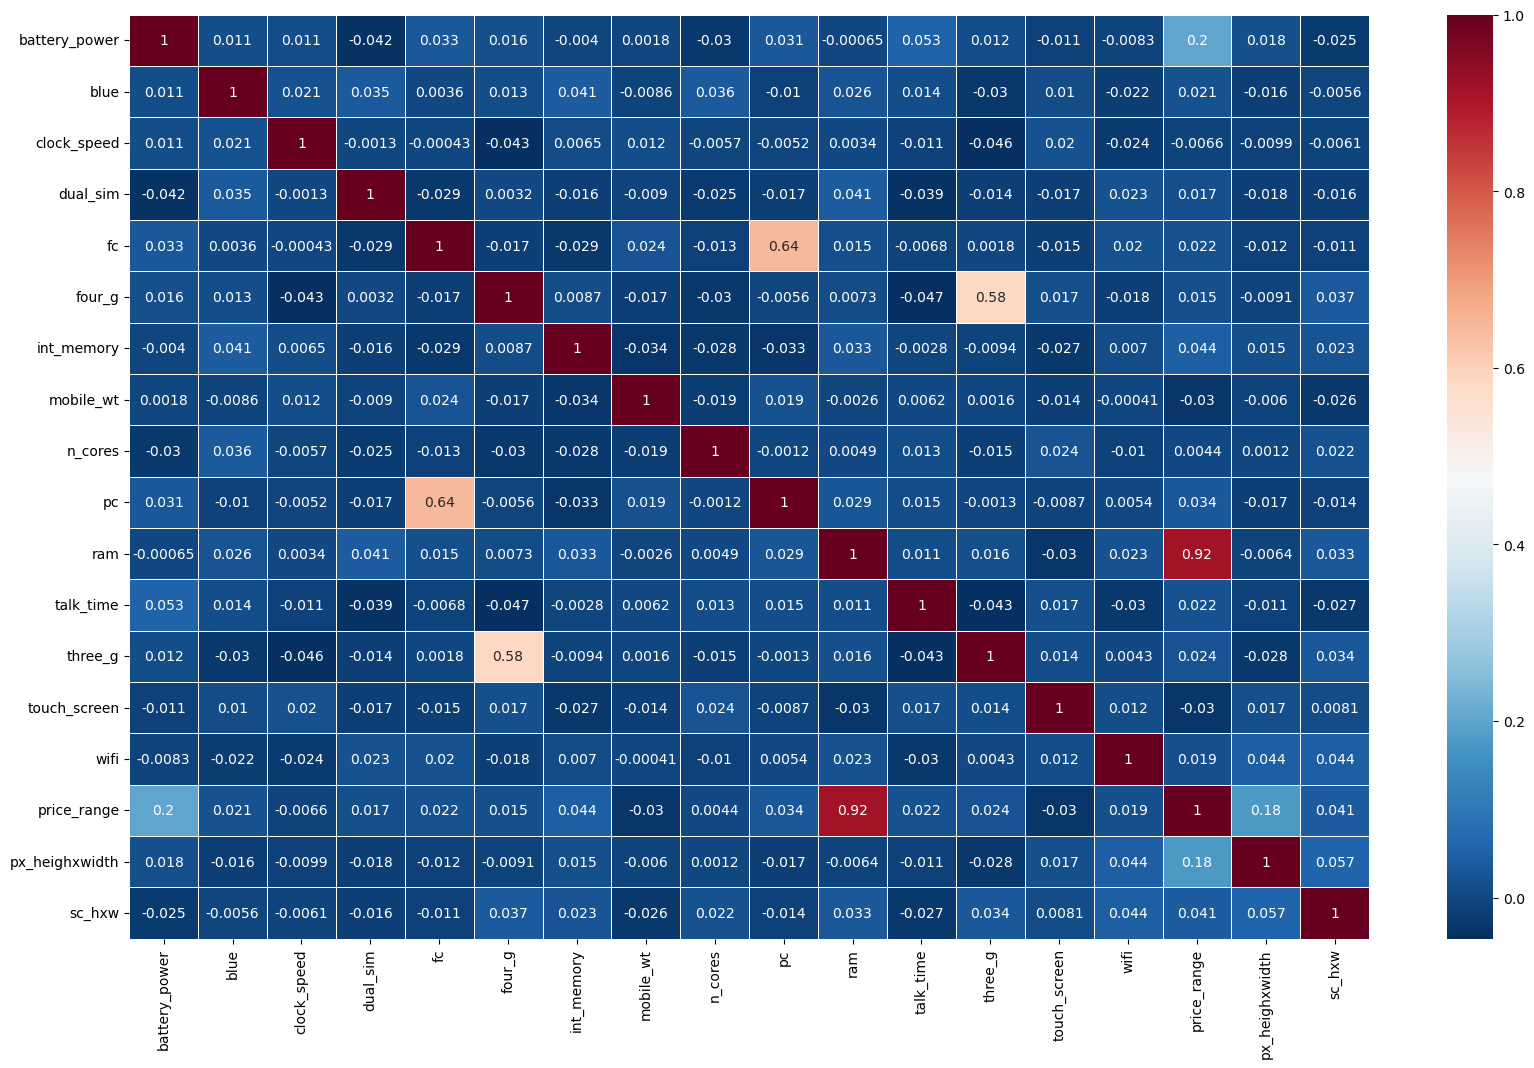

In [55]:
num_features = ['battery_power','clock_speed','int_memory','mobile_wt','n_cores','ram','px_heighxwidth','sc_hxw','price_range']

fig,ax = plt.subplots(figsize =(20,12))
ax = sns.heatmap(df.corr(),cmap='RdBu_r',cbar =True, annot=True,linewidths=0.5,ax=ax)
plt.show()

In [25]:
df.drop(['m_dep','px_height','px_width','sc_h','sc_w'],axis=1,inplace=True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,px_heighxwidth,sc_hxw
0,842,0,2.2,0,1,0,7,188,2,2,2549,19,0,0,1,1,15120,63
1,1021,1,0.5,1,0,1,53,136,3,6,2631,7,1,1,0,2,1799140,51
2,563,1,0.5,1,2,1,41,145,5,6,2603,9,1,1,0,2,2167308,22
3,615,1,2.5,0,0,0,10,131,6,9,2769,11,1,0,0,2,2171776,128
4,1821,1,1.2,0,13,1,44,141,2,14,1411,15,1,1,0,1,1464096,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,106,6,14,668,19,1,1,0,0,2309580,52
1996,1965,1,2.6,1,0,0,39,187,4,3,2032,16,1,1,1,2,1797975,110
1997,1911,0,0.9,1,1,1,36,108,8,3,3057,5,1,1,0,3,1416576,9
1998,1512,0,0.9,0,4,1,46,145,5,5,869,19,1,1,1,0,225120,180


In [34]:
X = df.drop('price_range', axis=1)  # Features
y = df['price_range']  # Target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # You can choose the number of components or the explained variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [39]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

svm_classifier = SVC(random_state=42)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)


print("En iyi Parametreler:", grid_search.best_params_)

best_svm_classifier = grid_search.best_estimator_

cv_scores = cross_val_score(best_svm_classifier, X_train_pca, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Skorları:", cv_scores)
print("Ortalama Cross-Validation Puanı:", cv_scores.mean())

y_pred = best_svm_classifier.predict(X_test_pca)
print("\nSVM Sınıflandırıcı (En İyi Parametreler) - Test Seti:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Cross-Validation Scores: [0.93125  0.9375   0.921875 0.9125   0.93125 ]
Mean CV Score: 0.9268750000000001

SVM Classifier (Best Parameters) - Test Set:
Accuracy: 0.9425
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.93      0.93        91
           2       0.90      0.90      0.90        92
           3       0.96      0.95      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



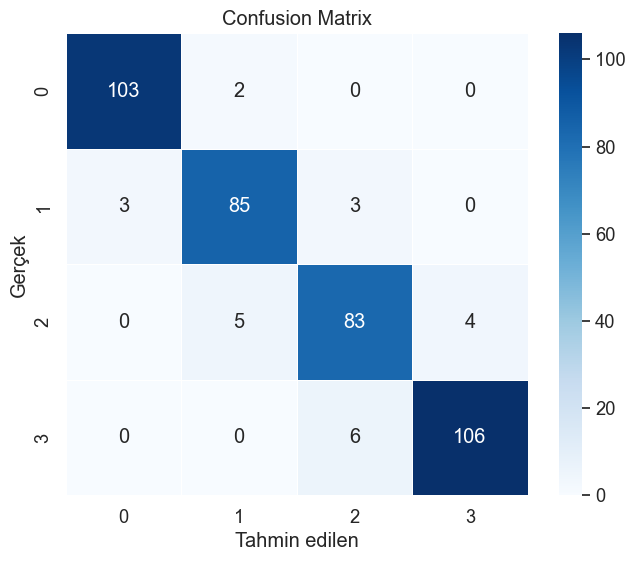

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix hesapla
conf_matrix = confusion_matrix(y_test, y_pred)

# Seaborn ile renkli bir heatmap oluştur
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)

# Grafik ayarları
plt.title('Confusion Matrix')
plt.xlabel('Tahmin edilen')
plt.ylabel('Gerçek')

# Göster
plt.show()